<img src="Data/ost_logo.png" width="240"  align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> und <a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# V11: Cluster-Analysis

Inspired by *Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017


In [3]:
%matplotlib inline

from IPython.display import Image
import matplotlib.pyplot as plt

## 1. Hierarchical Agglomerative Clustering

*Hierarchical cluster analysis* refers to a specific family of distance-based methods for cluster analysis (structure discovery in data sets). Clusters consist of objects that are less distant from each other (or vice versa: more similar) than objects in other clusters. The methods in this family can be differentiated according to the distance or proximity measures used (between objects, but also between entire clusters) and according to their calculation rule.

If one subdivides according to the calculation rule, one distinguishes between two important types of methods:

- the __divisive cluster methods__, in which all objects are initially considered to belong to a cluster and then the already formed clusters are gradually divided into smaller and smaller clusters until each cluster consists of only one object. (Also referred to as the __"top-down method"__)
- The __agglomerative cluster method__, in which each object initially forms a cluster and then the clusters already formed are gradually combined into ever larger clusters until all objects belong to one cluster. (Also referred to as the __"bottom-up method"__)

For both methods, once a cluster has been formed, it can no longer be changed. The structure is either only ever refined ("divisive") or only coarsened ("agglomerative"), so that a strict cluster hierarchy is created. It is no longer possible to recognise from the resulting hierarchy how it was calculated.


https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse

### 1.1 Similarity is described by a metric

The *agglomerative calculation* of a hierarchical cluster analysis is the simplest and most flexible case.
- At the beginning, each object is initially recognised as a separate cluster. 
- Then, in each step, the clusters closest to each other are combined to form a cluster.
- If a cluster consists of several objects, it is necessary to specify how the distance between clusters is calculated. 

This is where the individual agglomerative methods differ. The procedure can be terminated when all clusters exceed/fall below a certain __distance/similarity__ to each other or when a sufficiently small number of clusters has been determined. This is trivial for clusters with only one object, as specified at the beginning.

In order to carry out an agglomerative cluster analysis, the following must be defined

 - (a) a __distance or similarity measure__ to determine the distance between two objects and
 - (b) a __fusion algorithm__ to determine the distance between two clusters.

The choice of the fusion algorithm is often more important than that of the distance or similarity measure.



### 1.2 Fusion criteria (linkage criteria) decide when two clusters are merged

The following table provides an overview of common fusion algorithms. The distance $D$ between cluster $A$ and the new cluster $B$ is often calculated using the distance or dissimilarity $d$ of two objects. The new cluster $B$ is created from the fusion of the "green" and "blue" clusters.

#### (a) Single-Linkage
$$ {\displaystyle D_{\text{s}}(A,B):=\min _{a\in A,b\in B}\{d(a,b)\}}$$
<img src="Bilder/SingleLinkage.png" width="240" height="240" align="center"/>
- Minimum distance between all element pairs from the two clusters
- This method tends to form chains.

#### (b) Complete-Linkage
$${\displaystyle D_{\text{c}}(A,B):=\max _{a\in A,b\in B}\{d(a,b)\}}$$
<img src="Bilder/CompleteLinkage.png" width="240" height="240" align="center"/>
- Maximum distance between all pairs of elements from the two clusters
- This method tends to form small clusters.

#### (c)  Average-Linkage, Weighted Pair-Group Method using arithmetic Averages (WPGMA)
$$ {\displaystyle D_{\text{avg}}(A,B):={\tfrac {1}{|A||B|}}\sum _{a\in A,b\in B}d(a,b)}$$
<img src="Bilder/AverageLinkage.png" width="240" height="240" align="center"/>
- Average distance between all pairs of elements in the two clusters

#### (d) Centroid-Method, Unweighted Pair Group Method using Centroids (UPGMC)
$${\displaystyle D_{\text{centroid}}(A,B):=d({\bar {a}},{\bar {b}})}$$
<img src="Bilder/CentroidLinkage.png" width="240" height="240" align="center"/>
- Distance between the centres of the two clusters
- where ${\displaystyle {\bar {a}}}$ is the centre of cluster $A$, ${\displaystyle {\bar {b}}}$ is the centre of cluster $B$.

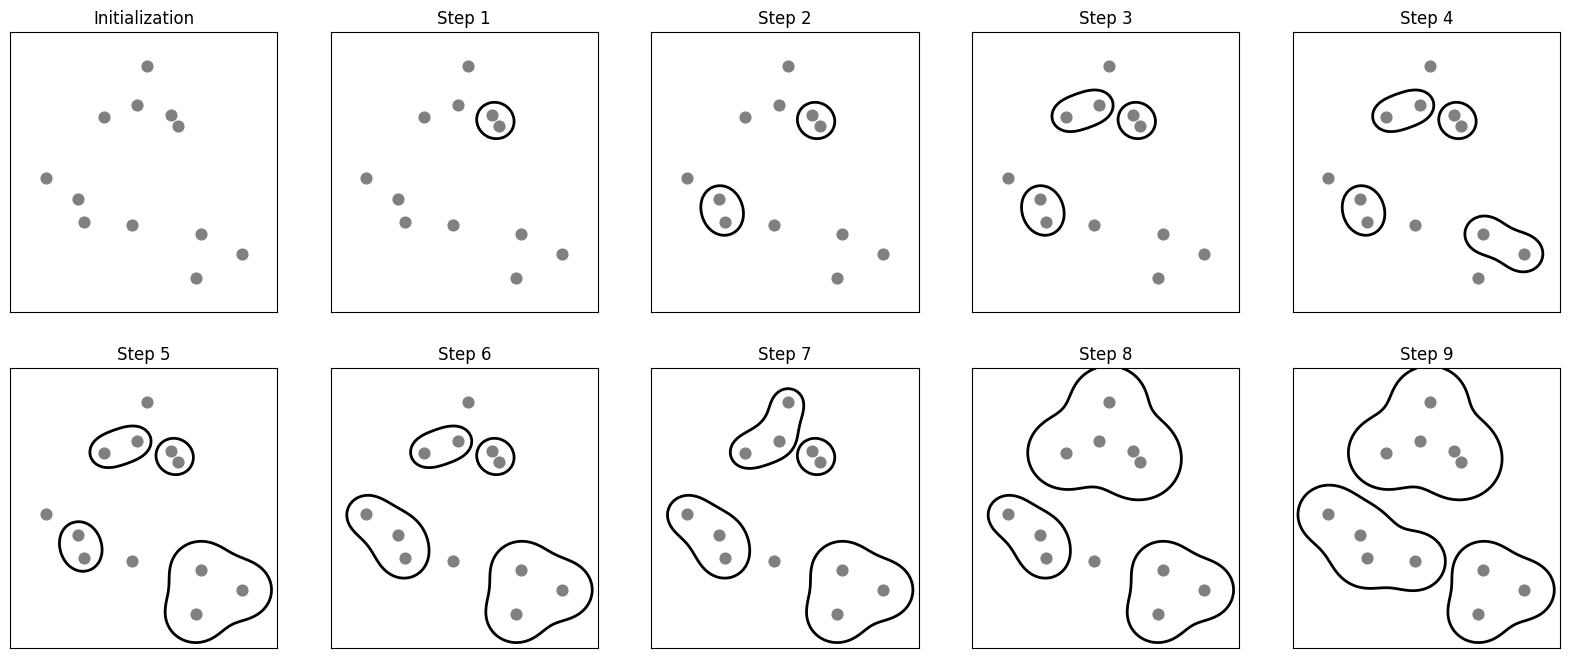

In [4]:
#!pip install mglearn

import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

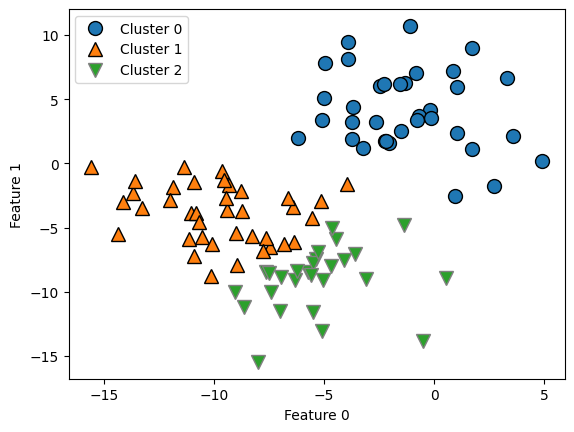

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1,cluster_std=3)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

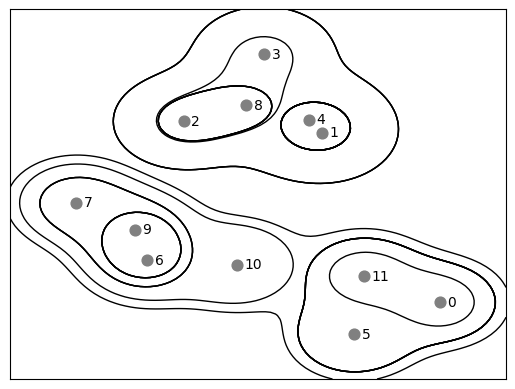

In [6]:
mglearn.plots.plot_agglomerative()

### Dendrograms

The _dendrogram_ (Greek δένδρον (dendron) = tree) can be used to visualise the tree structure resulting from a hierarchical clustering. The dendrogram is a tree that represents the hierarchical decomposition of the data set ${\displaystyle O}$ into smaller and smaller subsets. 
- The **root** represents a single cluster that contains the entire set ${\displaystyle O}$. 
- The **leaves** of the tree represent clusters, each of which contains a single object of the data set. 
- An inner **node** represents the union of all its child nodes. 
- Each **edge** between a node and one of its child nodes also has the distance between the two representing sets of objects as an attribute.

In this representation, a desired number of clusters can be selected by cutting the dendrogram at a suitable height. Typically, you are looking for a point where there is a large jump in __distance or (dis)similarity between two fusions__. If there are hierarchical clusters with significantly different sizes, it may be necessary to split at different heights: while a cluster at one height is still connected to its neighbours, another ("thinner") cluster at this height already breaks down into individual objects.

Text(0, 0.5, 'Cluster distance')

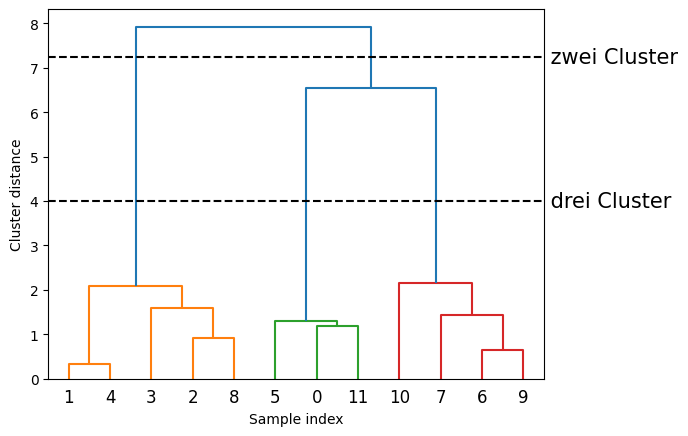

In [7]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' zwei Cluster', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' drei Cluster', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## 1.3 Grouping clusters bottom-up based on a distance matrix

Clustering starts by calculating a distance between each pair of units you want to cluster.  The distance matrix will be symmetric (because the distance between x and y is equal to the distance between y and x) and have zeros on the diagonal (because each element is zero distance from itself).  


In [8]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

ID_0      ID_1      ID_2      ID_3      ID_4
ID_0  0.000000  4.973534  5.516653  5.899885  3.835396
ID_1  4.973534  0.000000  4.347073  5.104311  6.698233
ID_2  5.516653  4.347073  0.000000  7.244262  8.316594
ID_3  5.899885  5.104311  7.244262  0.000000  4.382864
ID_4  3.835396  6.698233  8.316594  4.382864  0.000000

Wir können entweder eine kondensierte Distanzmatrix (obere Dreiecksmatrix) aus der `pdist`-Funktion übergeben, oder wir können das "ursprüngliche" Datenfeld übergeben und mit `metric='euclidean'`einen euklidischen Abstand definieren. 

In [10]:
# 2. correct approach: Condensed distance matrix
from scipy.cluster.hierarchy import dendrogram, linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

row label 1  row label 2  distance  no. of items in clust.
cluster 1          0.0          4.0  3.835396                     2.0
cluster 2          1.0          2.0  4.347073                     2.0
cluster 3          3.0          5.0  5.899885                     3.0
cluster 4          6.0          7.0  8.316594                     5.0

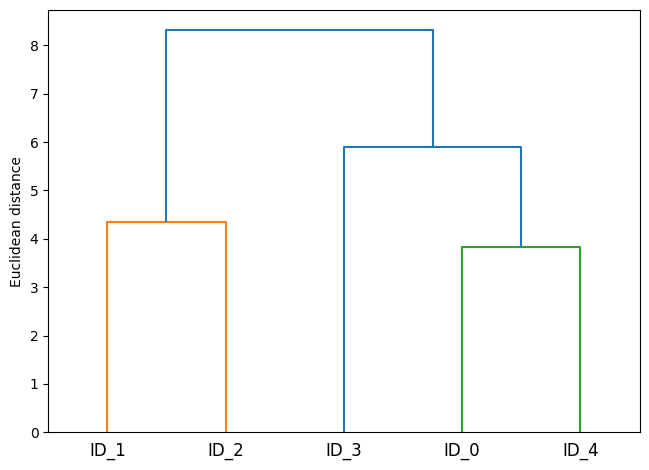

In [11]:

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

<br>
<br>

### Faces Dataset

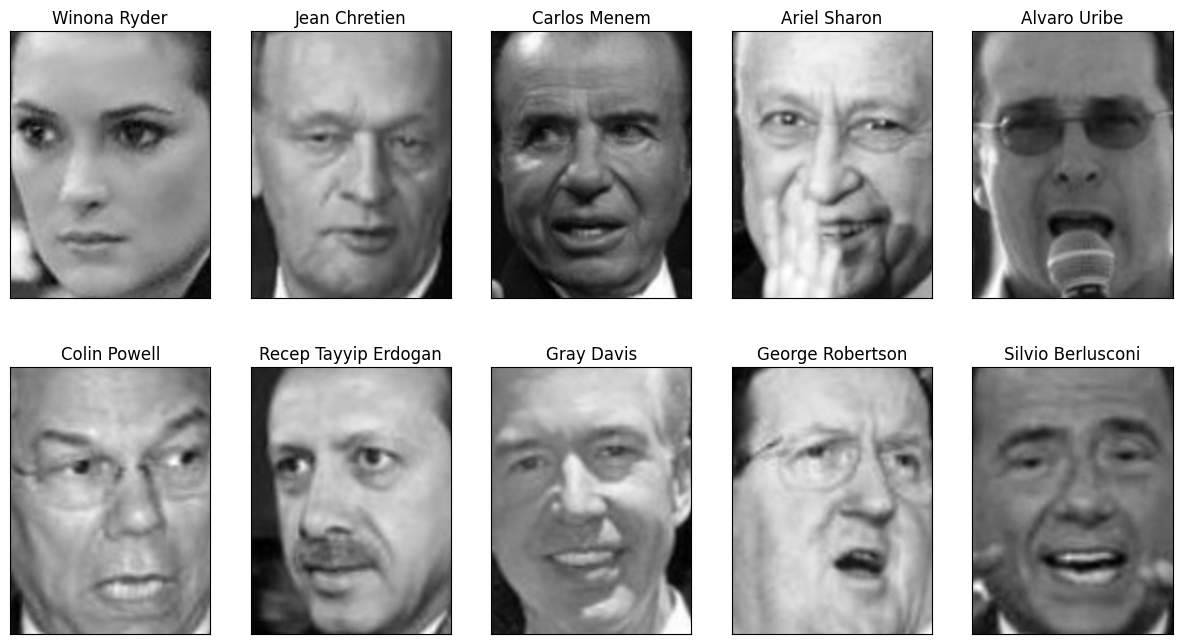

In [12]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=2)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image,cmap='gray')
    ax.set_title(people.target_names[target])

Certainly! Here's the answer formatted in Markdown:

---

### What does `whiten=True` do?

When you enable whitening in PCA (Principal Component Analysis) using scikit-learn, it ensures that the transformed data has a unit variance along each of the principal components. Normally, PCA scales each component by the square root of its corresponding eigenvalue, which represents the amount of variance captured by that component. This means that components with higher variance have greater influence.

When `whiten=True`:

1. Each principal component is scaled by the inverse of the square root of its eigenvalue.
2. This scaling effectively normalizes each component to have a variance of 1. Thus, all principal components contribute equally, in terms of variance, to the transformed data.

### Why is it sometimes necessary to whiten?

Whitening is often necessary or beneficial in scenarios where you want the features to be uncorrelated and equally scaled. Here are a few reasons to use whitening:

1. **Equal Contribution**: In machine learning algorithms, especially those sensitive to the scale of input features (like SVMs or logistic regression), having features that contribute equally ensures that the model doesn't bias towards features with higher variance.
   
2. **Decorrelation**: Whitening transforms the data such that the principal components are not only uncorrelated but also have the same scale. This is particularly useful in image processing and computer vision where whitened components as features can sometimes improve the performance of subsequent learning algorithms.

3. **Stabilizing Learning**: In deep learning, having inputs that are whitened (i.e., uncorrelated and with unit variance) can make the training process faster and more stable, as it helps in preventing large updates to the weights, which can lead to numerical instability.

4. **Preconditioning**: Whitening can be seen as a form of preconditioning the data, making sure that the condition number of the covariance matrix is closer to 1. This makes optimization algorithms more efficient and stable.

It's important to note that whitening is not always necessary and can sometimes lead to issues if the variance of the data is artificially equalized when it should not be. Hence, whether to apply whitening or not should depend on the specific requirements and the nature of data in your machine learning application.

---

In [13]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 250, 188)
Number of classes: 62


In [14]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [15]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)



<BarContainer object of 150 artists>

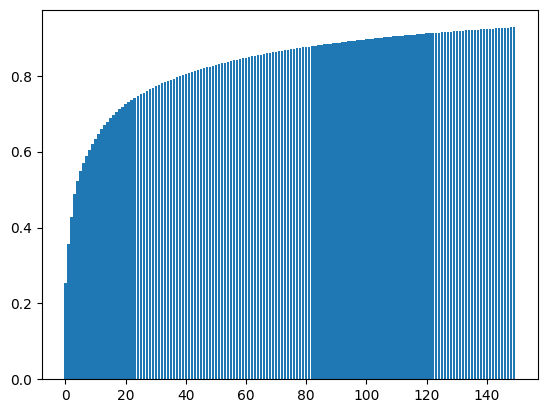

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True, random_state=0).fit(X_train)
X_pca = pca.transform(X_people)

plt.bar(range(150), np.cumsum(pca.explained_variance_ratio_))

In [18]:
# extract clusters with ward agglomerative clustering
n_clusters=23
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [224 429 148  89 202   4 112  66  33  37 165 109  27  25 127 143  61   3
  17  23   1  14   4]


In [19]:
labels_agg

array([11,  6,  0, ..., 11, 15, 12])

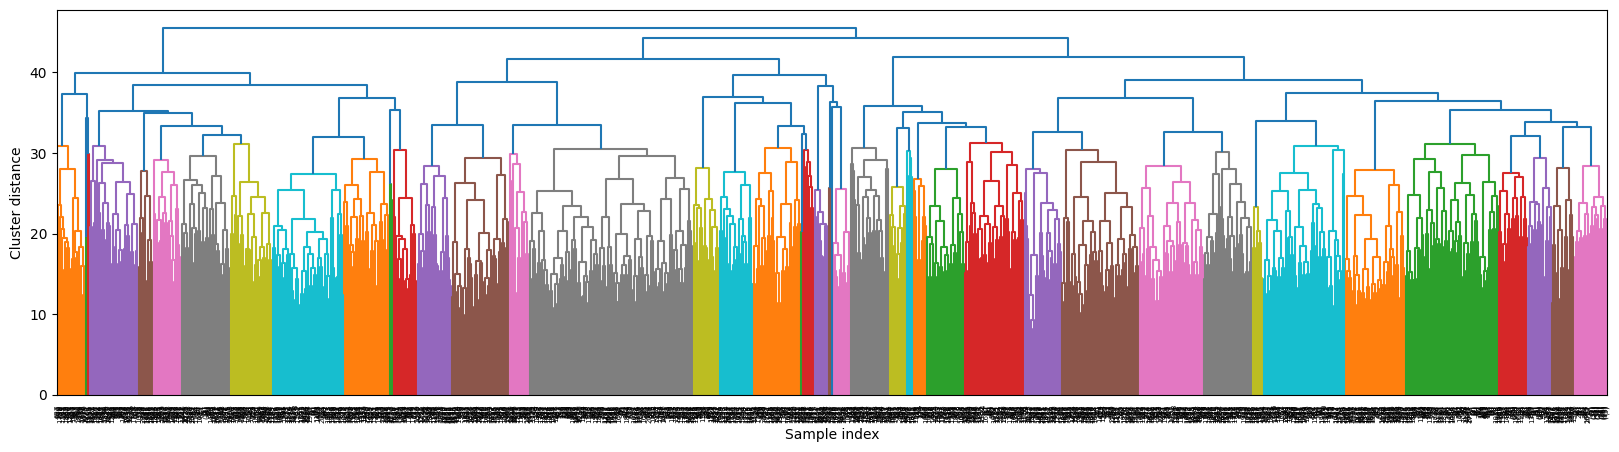

In [20]:
linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=13, truncate_mode='level', no_labels=False)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()


/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_6924/1534359191.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},


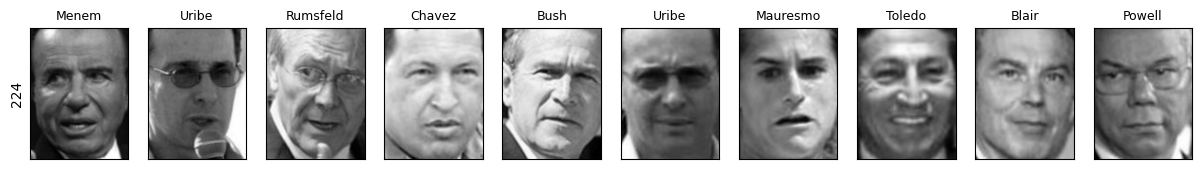

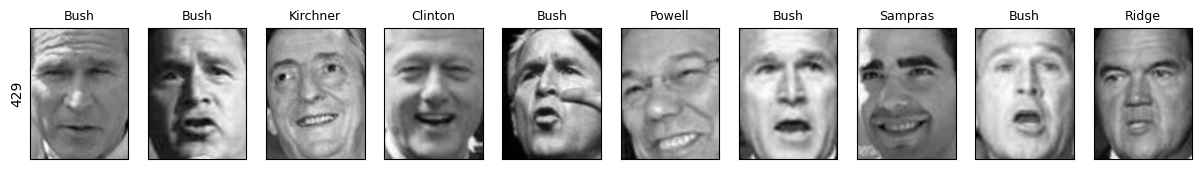

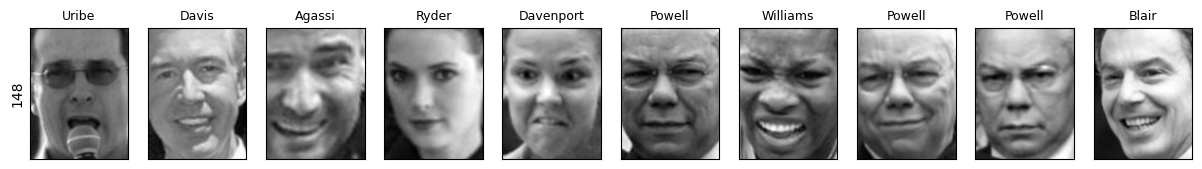

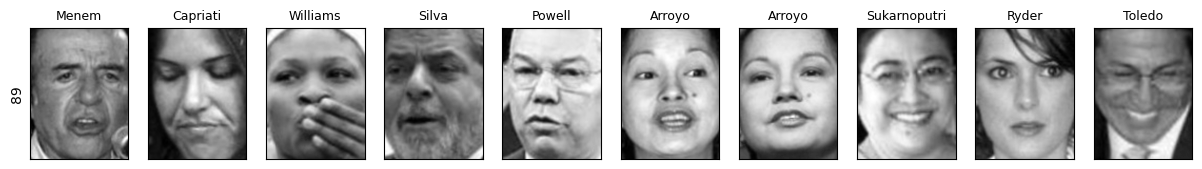

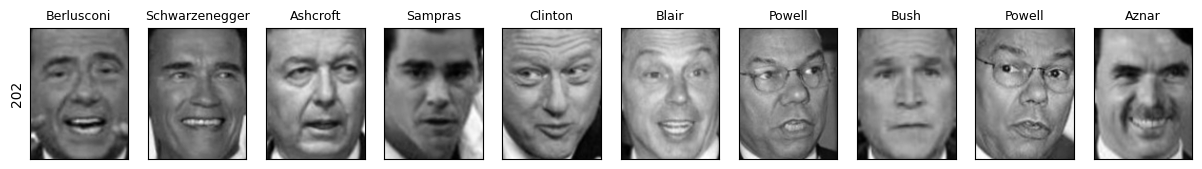

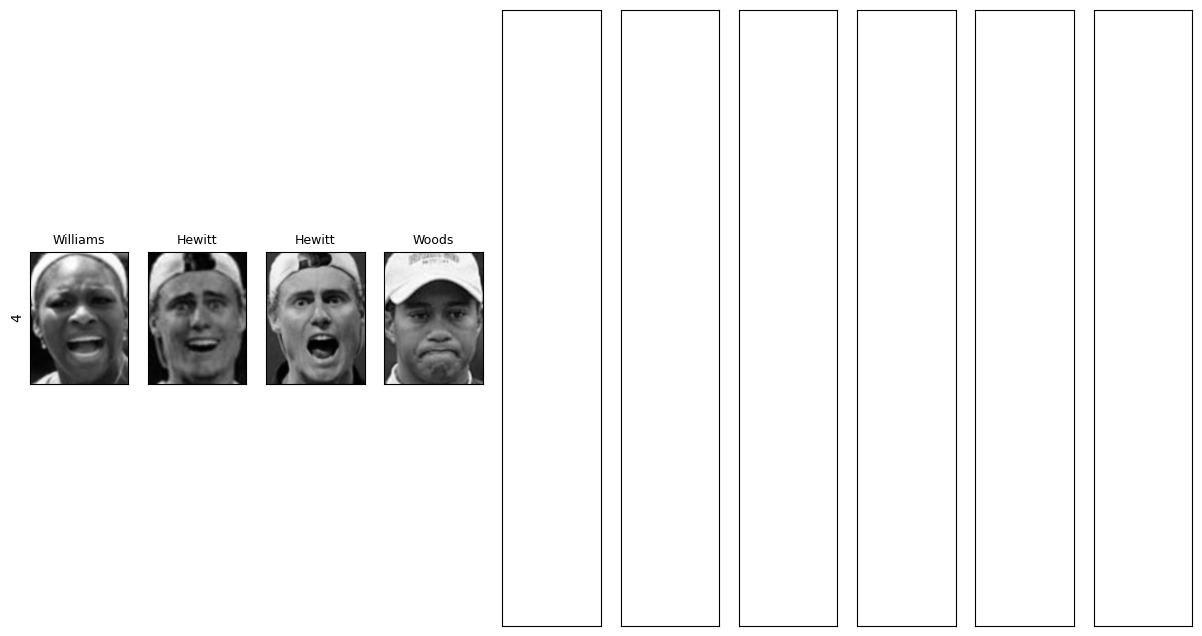

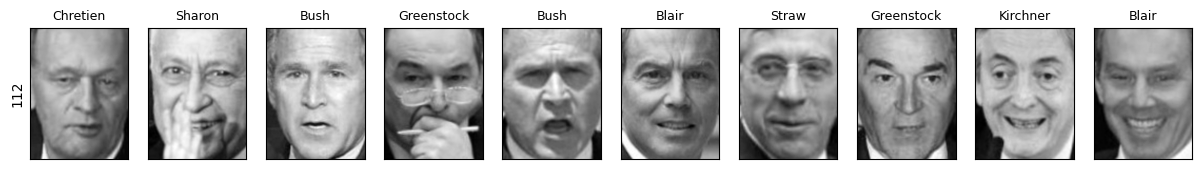

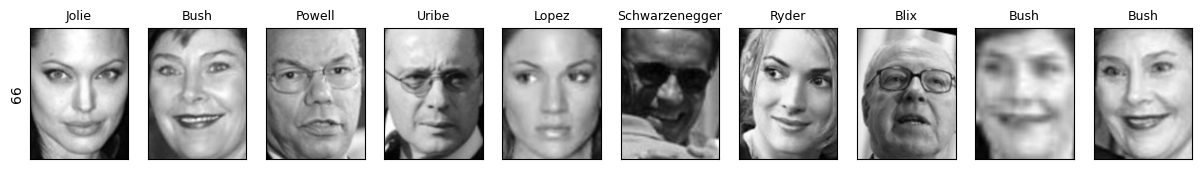

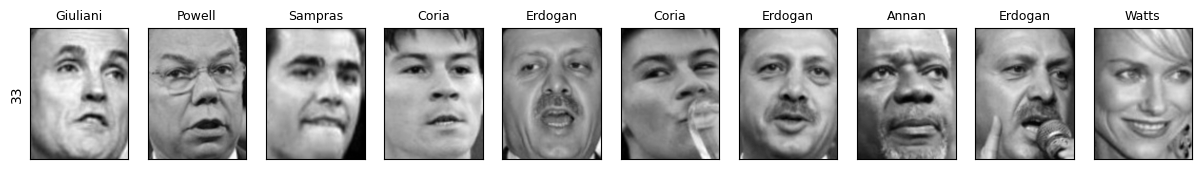

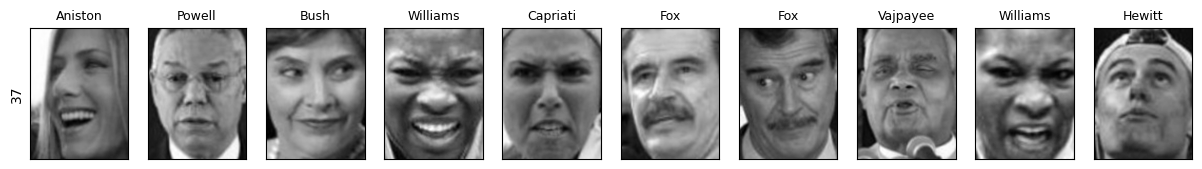

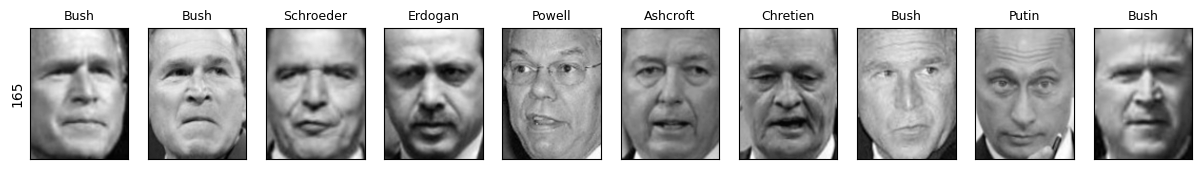

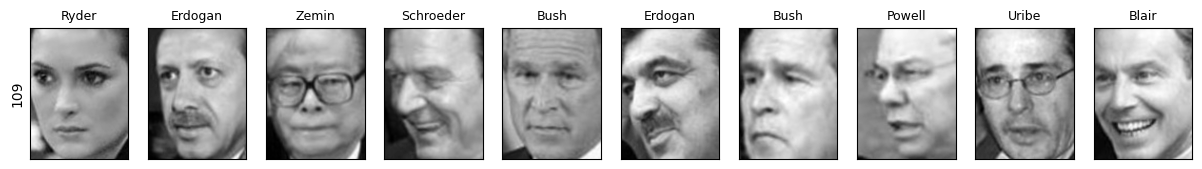

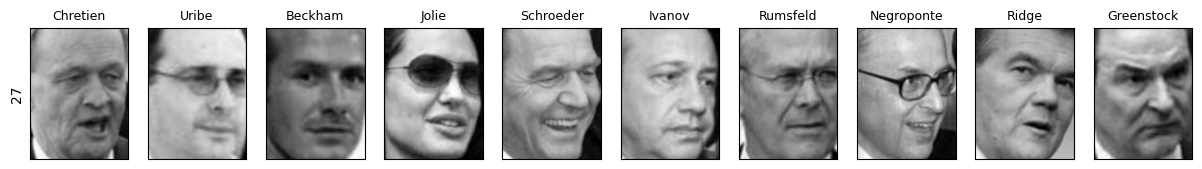

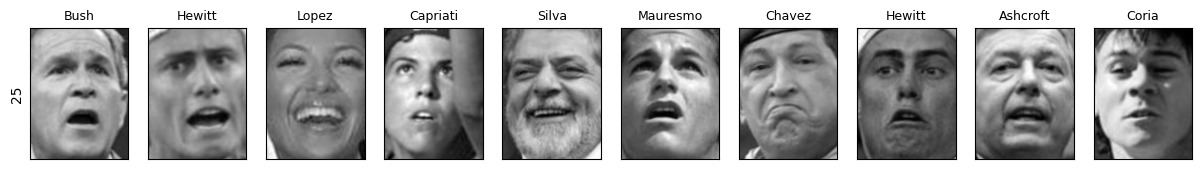

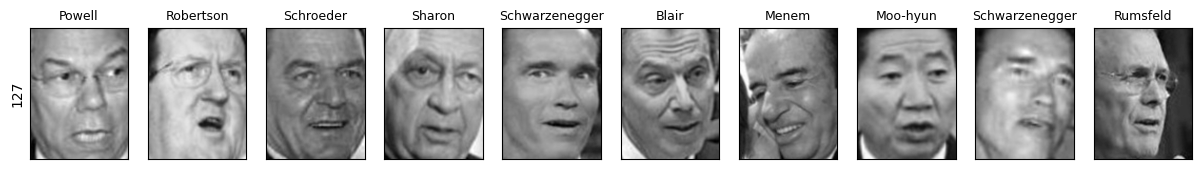

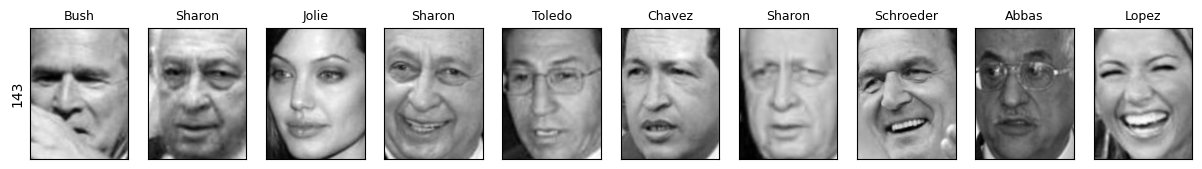

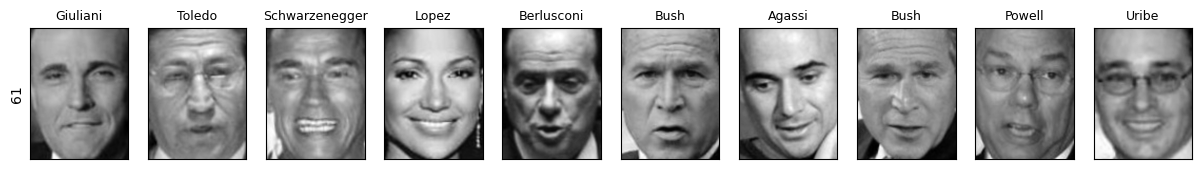

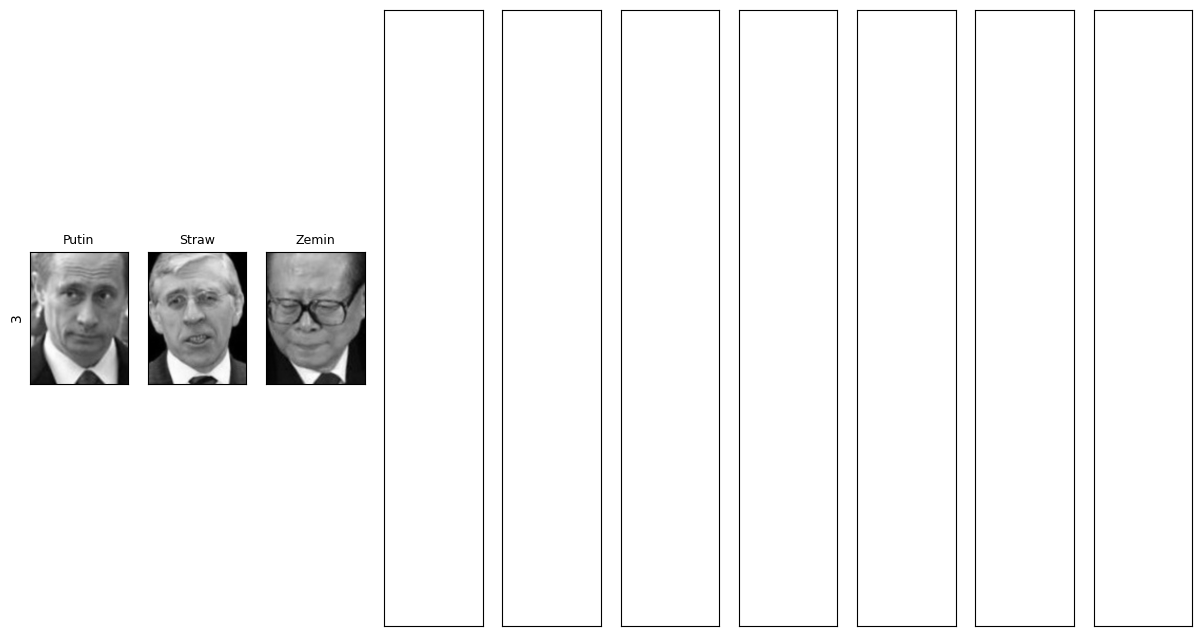

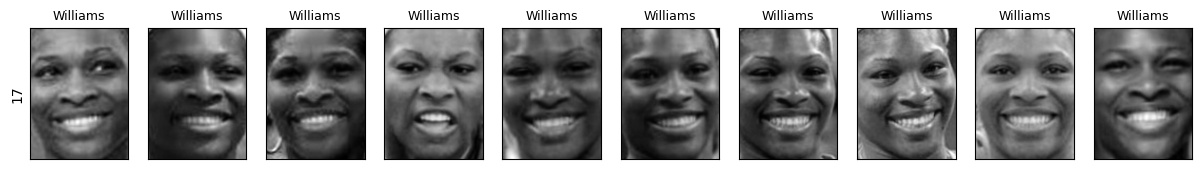

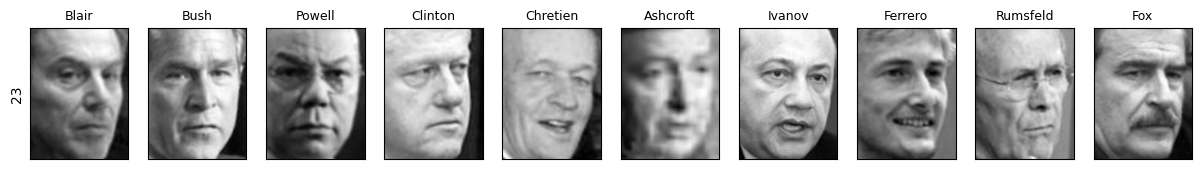

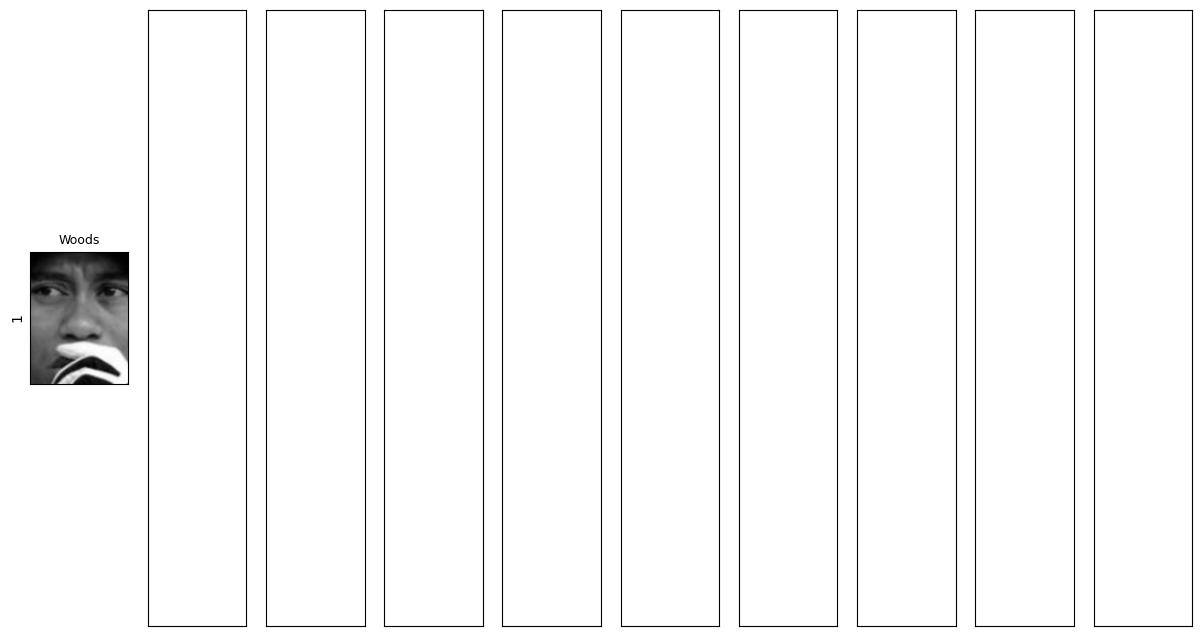

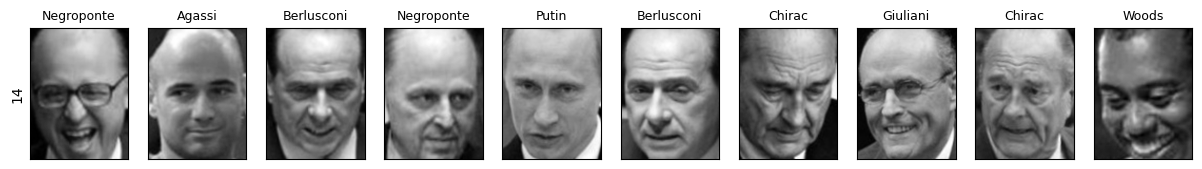

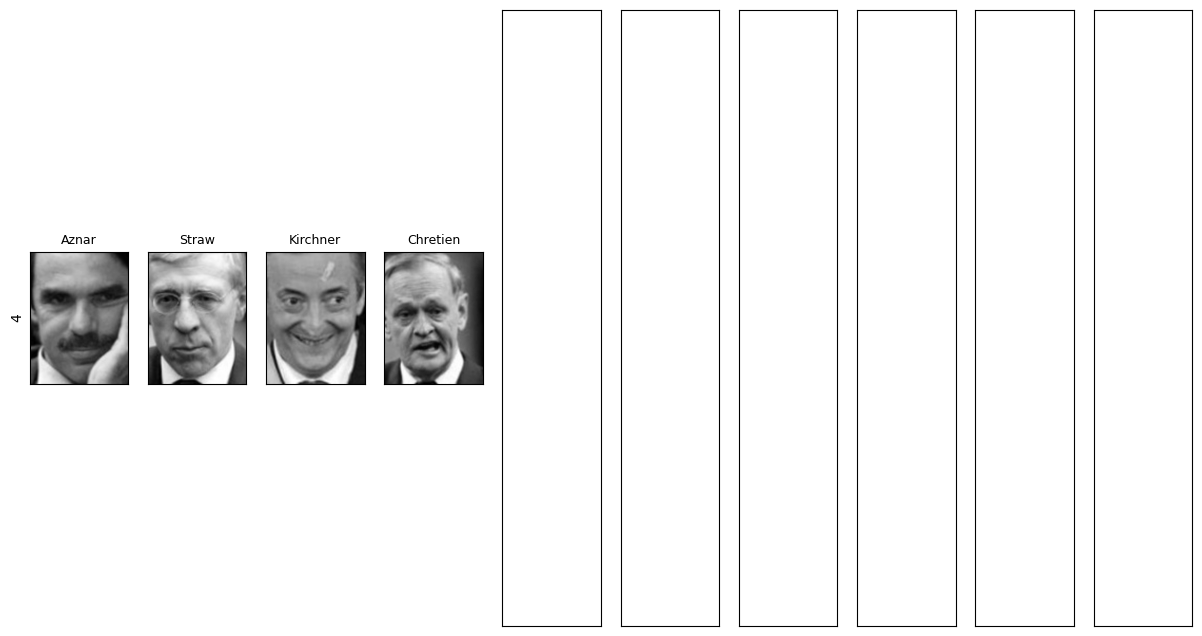

In [21]:
plt.close()
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        #ax.imshow(image.reshape(image_shape), cmap='gray', vmin=0, vmax=1)
        ax.imshow(image.reshape(image_shape), cmap='gray')
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

# Group similar objects with k-means

## K-means Clustering using `scikit-learn`

The aim of k-Means is to divide the data set into $k$ partitions in such a way that the sum of the squared deviations from the cluster centres of gravity is minimal. Mathematically, this corresponds to the optimisation of the function (*inter cluster inertia*)

$${\displaystyle J=\sum _{i=1}^{k}\sum _{\mathbf {x} _{j}\in C_{i}}{\|\mathbf {x} _{j}-{\boldsymbol {\mu }}_{i}\|^{2}}}$$

with the data points ${\displaystyle \mathbf {x} _{j}}$ and the centroids ${\displaystyle {\boldsymbol {\mu }}_{i}}$ of the clusters ${\displaystyle C_{i}}$ . 

This objective function is based on the __least squares method__ and is also referred to as *clustering by variance minimisation (inter cluster inertia), as the sum of the variances of the clusters is minimised*. 
Furthermore, since ${\displaystyle \|\mathbf {x} _{j}-{\boldsymbol {\mu }}_{i}\|^{2}}$ is the squared Euclidean distance, k-Means effectively assigns each object to the nearest (by Euclidean distance) cluster centroid.
Conversely, the arithmetic mean is a least squares estimator, so it also optimises this criterion.

Since the search for the optimal solution is difficult (NP-hard), an __approximative algorithm__ is normally used.

The most commonly used k-means algorithm is the __Lloyd algorithm__, which is often referred to as "the k-means algorithm", although Lloyd did not use this name. 

Lloyd's algorithm consists of three steps:

- 1. __Initialisation__: choose ${\displaystyle k}$ random means from the data set..: 
$$ {\displaystyle \mathbf {m} _{1}^{(1)},\ldots ,\mathbf {m} _{k}^{(1)}}$$ 


- 2. __Assignment__: Each data object is assigned to the cluster for which the cluster variance is increased the least.

$$ {\displaystyle C_{i}^{(t)}=\left\{\mathbf {x} _{j}: {\big \|}\mathbf {x} _{j}-\mathbf {m} _{i}^{(t)}{\big \|}^{2}\leq {\big \|}\mathbf {x} _{j}-\mathbf {m} _{i^{*}}^{(t)}{\big \|}^{2}{\forall}i^{*}=1,\ldots ,k\right\}} $$


- 3. __Update__: Recalculate the centres of the clusters:
$$ {\displaystyle \mathbf {m} _{i}^{(t+1)}={\frac {1}{|C_{i}^{(t)}|}}\sum _{\mathbf {x} _{j}\in C_{i}^{(t)}}\mathbf {x} _{j}}$$

- Steps 2-3 are repeated until the assignments no longer change.


#### Disadvantages

k-Means is a powerful algorithm, but it is not without its weaknesses. A k-Means algorithm does not have to find the best possible solution. 
- The solution found depends heavily on the selected starting points. The simplest approach is to start the algorithm several times in succession with different starting values and take the best solution. 
- Another disadvantage is that the number of cluster centres $k$ is selected in advance. Using an unsuitable $k$ can result in completely different, possibly unintuitive solutions. With an "incorrect" $k$, no good clustering can take place. The solution is to try different values for $k$ and then choose a suitable one, for example using the silhouette coefficient, or by comparing the different clustering costs.

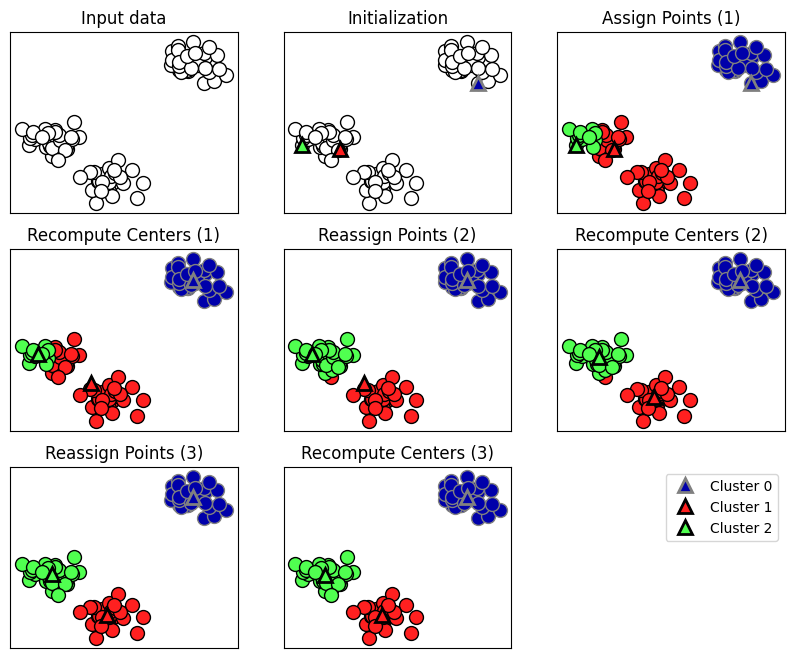

In [22]:
mglearn.plots.plot_kmeans_algorithm()

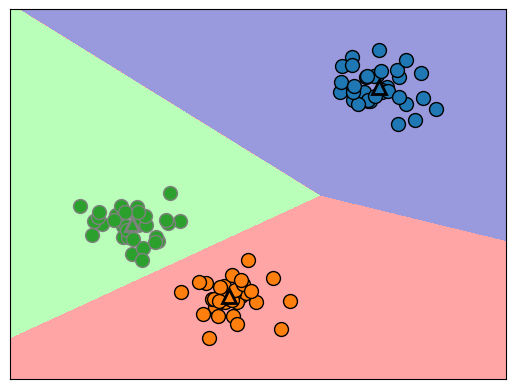

In [23]:
mglearn.plots.plot_kmeans_boundaries()

### (a) Scatterplot
- Create a distribution of 8 clusters with 250 data points and visualise it as a scatterplot. How many clusters can you recognise with the naked eye? 
- Try to change the standard deviation of the cluster cluster_std until it becomes difficult for you to distinguish the 8 different clusters.

You can use the following lines of code to generate two-dimensional data clusters, which can be used for
can be used for testing clustering algorithms. In this exercise
you will learn how to apply the k-means algorithm and how to determine the optimal number
of clusters with the elbow criterion in the inertia plot.

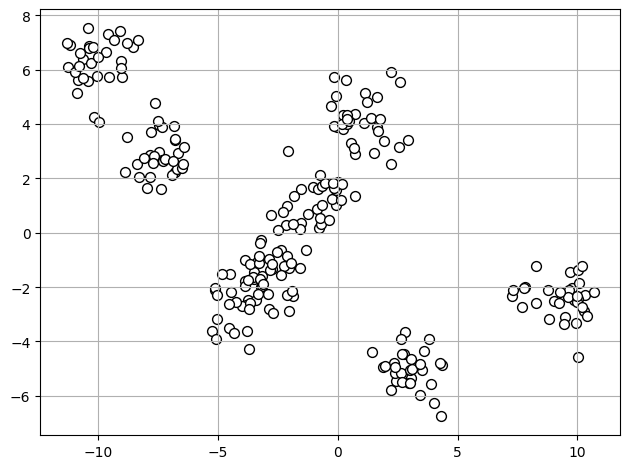

In [24]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, 
                  n_features=8, 
                  centers=8, 
                  cluster_std=0.85, 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

### b) `KMeans`
Import the method `KMeans` from `sklearn.cluster`. Instantiate a model named km with 8 clusters (n_clusters=8). Set the maximum number of iterations to `max_iter=300` and `n_init=10`. Fit the model to the data and predict the cluster label with `km.fit_predict(X)`. Note: One way to deal with convergence problems is to choose larger values for tol. This is a parameter that controls the tolerance to changes in the error sum within a cluster. Try a tolerance of $10^{-4}$.

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
km.score(X)



-5285.859722393956

### (c) Displaying the clusters

Use the `PlotCluster` function to display the grouped data.

In [26]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
ColorNames=list(colors.keys())
HSV=colors.values()


def PlotClusters(X,y, km):
    
    for ClusterNumber in range(km.n_clusters):
        plt.scatter(X[y_km == ClusterNumber, 0],
                X[y_km == ClusterNumber, 1],
                s=50, c=ColorNames[ClusterNumber+1],
                marker='s', edgecolor='black',
                label='cluster {0}'.format(ClusterNumber+1))
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    #plt.savefig('images/11_02.png', dpi=300)
    plt.show()

### d) Varying the number $k$ of clusters

Vary the number of clusters `n_clusters=8` in your KMeans clustering algorithm from 4 to 8 and plot the result each time using the `PlotCluster` function.

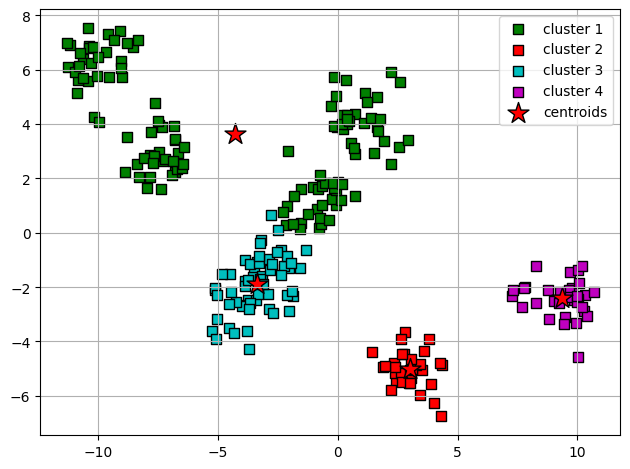

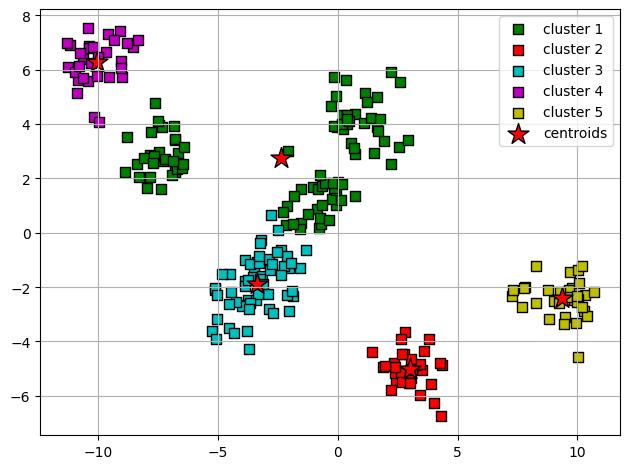

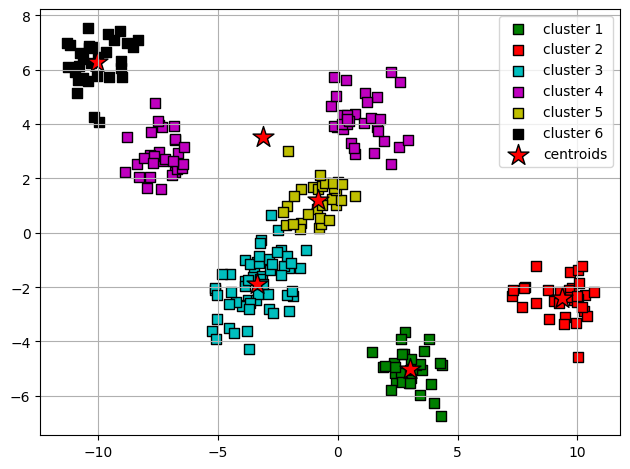

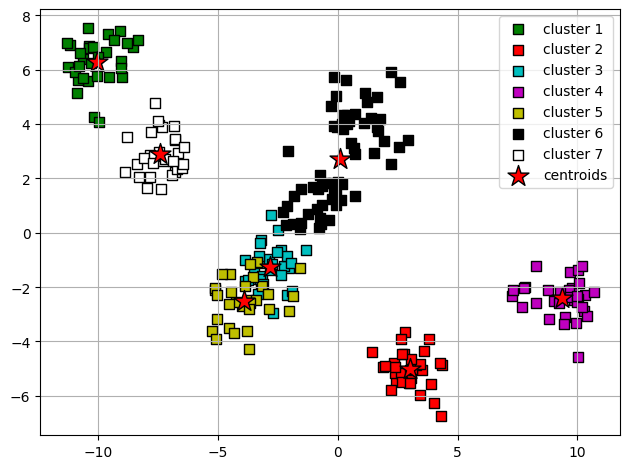

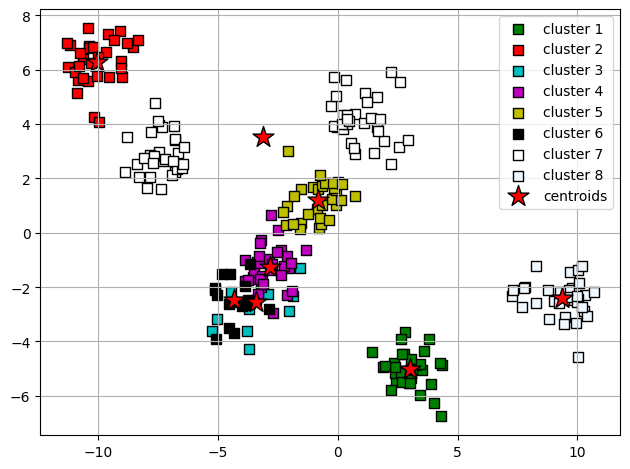

In [27]:

for n_clusters in range(4,9):
    km = KMeans(n_clusters=n_clusters,
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)
    PlotClusters(X,y, km)

<br>

## Use of the elbow criterion to determine the optimum number of clusters

### (e) Elbow method
In a for loop, vary the number of clusters from `n_clusters=8` to `n_clusters=15` and perform a cluster analysis on the data each time using the `km.fit_predict` method. Read the inertia `km.inertia_` and save these values in a list (append) as a function of the number of clusters. Display the inertia as a function
as a function of the number of clusters and determine the optimum number of clusters using the elbow criterion.

In [28]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 5285.86


In [29]:
print('Distortion: %.2f' % km.score(X))

Distortion: -5285.86


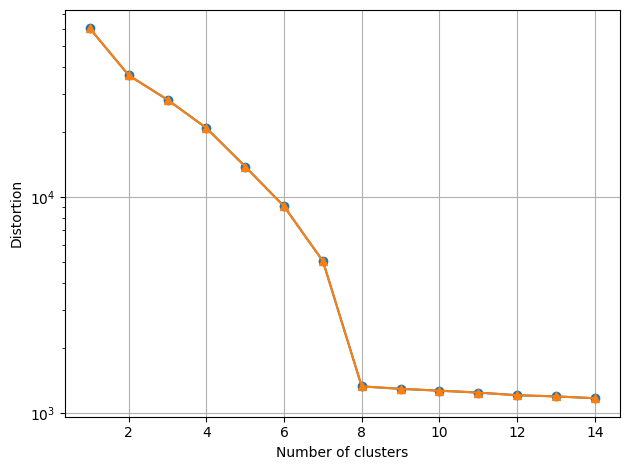

In [30]:
distortions = []
ScoreList   = []
maxNumberOfClusters=15

for i in range(1, maxNumberOfClusters):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    ScoreList.append(-km.score(X))
    
    
plt.semilogy(range(1, maxNumberOfClusters), distortions, marker='o')
plt.semilogy(range(1, maxNumberOfClusters), ScoreList, marker='^')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.grid(True)
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

### (f) kMeans++

Without an explicit definition, a random seed is used for the random generator to place the initial centroids. This can sometimes lead to poor clustering or slow convergence. Another strategy is to place the initial centroids far away from each other using the `k-means++` algorithm. This leads to a better and more uniform result compared to the classical k-means algorithm. The option can be selected under `sklearn.cluster.KMeans` by setting `init=k-means++`.

* D. Arthur and S. Vassilvitskii. k-means++: The Advantages of Careful Seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027-1035. Society for Industrial and Applied Mathematics, 2007). http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf


<br>

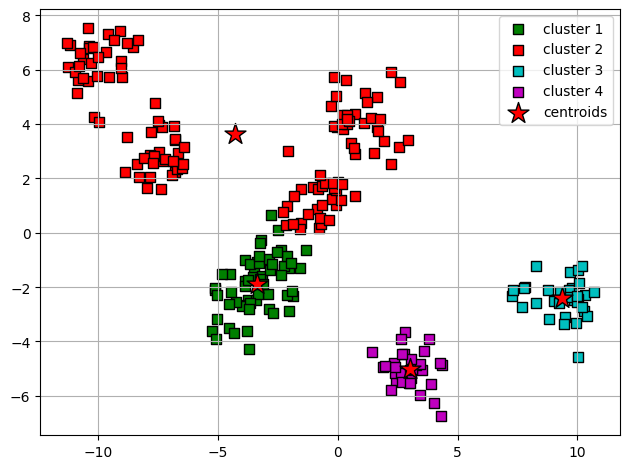

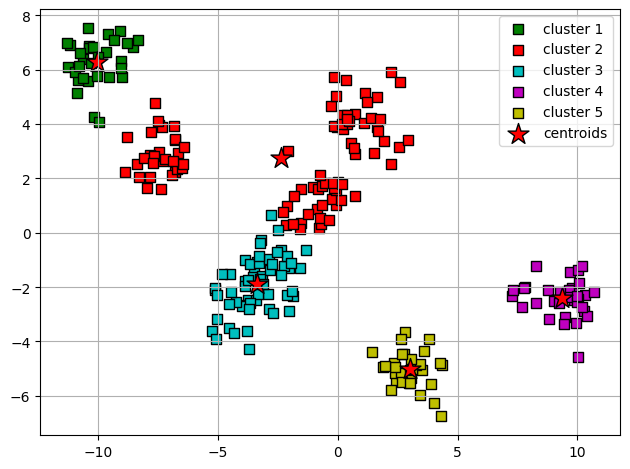

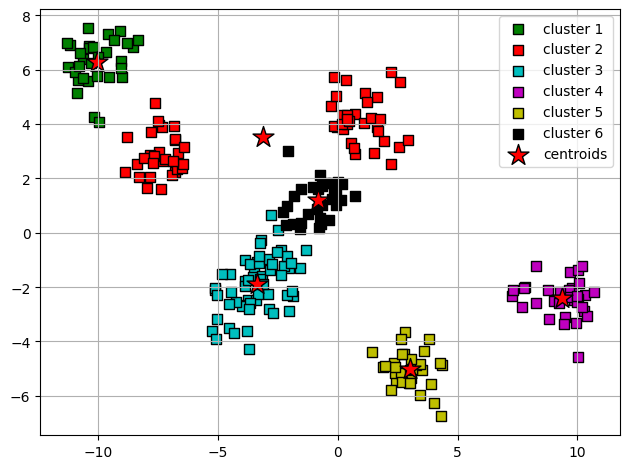

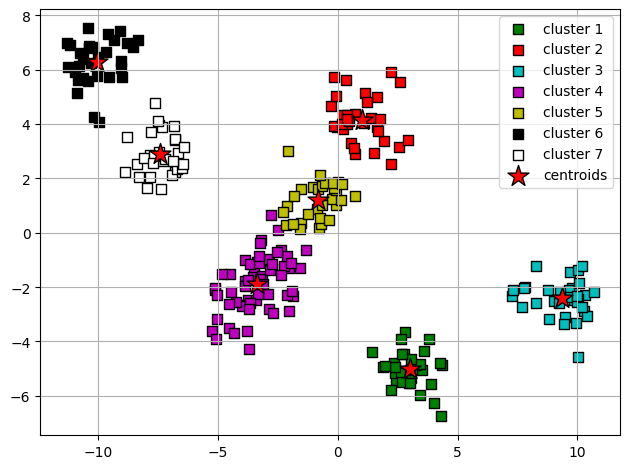

In [31]:
for n_clusters in range(4,8):
    km = KMeans(n_clusters=n_clusters,
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)
    PlotClusters(X,y, km)

# Darstellung der Cluster-Güte mit dem Silhouetten-Plot


If the object ${\displaystyle o}$ belongs to the cluster ${\displaystyle A}$, the silhouette of ${\displaystyle o}$ is defined as

$${\displaystyle S(o)={\begin{cases}0&{\text{ wenn }}\operatorname {dist} (A,o)=\operatorname {dist} (B,o)=0\\{\frac {\operatorname {dist} (B,o)-\operatorname {dist} (A,o)}{\max\{\operatorname {dist} (A,o),\,\operatorname {dist} (B,o)\}}}&{\text{ sonst }}\end{cases}}}$$


with ${\displaystyle \operatorname {dist} (A,o)}$ the distance of an object ${\displaystyle o}$ to the cluster ${\displaystyle A}$ and ${\displaystyle \operatorname {dist} (B,o)}$ the distance of an object ${\displaystyle o}$ to the nearest cluster ${\displaystyle B}$. The difference of the distance ${\displaystyle \operatorname {dist} (B,o)-\operatorname {dist} (A,o)}$ is weighted with the maximum distance. This means that ${\displaystyle S(o)}$ lies between -1 and 1 for an object ${\displaystyle o}$:

If the silhouette ${\displaystyle S(o)<0}$, then the objects of the nearest cluster ${\displaystyle B}$ are closer to the object ${\displaystyle o}$ than the objects of the cluster ${\displaystyle A}$ to which the object ${\displaystyle o}$ belongs. This indicates that the clustering can be improved.
If the silhouette ${\displaystyle S(o)\approx 0}$, then the object lies between two clusters and if the silhouette is close to one, then the object lies in a cluster.



The silhouette coefficient ${\displaystyle s_{C}}$ is defined as

$${\displaystyle s_{C}={\tfrac {1}{n_{C}}}\sum _{o\in C}s(o)}$$ 

thus defined as the arithmetic mean of all ${\displaystyle n_{C}} n_{C}$ silhouettes of the cluster ${\displaystyle C}$. The silhouette coefficient can be calculated for each cluster or for the entire dataset.

With the __k-means__ or __k-medoid algorithm__, it can be used to compare the results of several runs of the algorithm in order to obtain better parameters. This is particularly useful for the algorithms mentioned, as they start randomised and can therefore find different local maxima. The influence of the parameter $k$ can thus be reduced, as the silhouette coefficient is independent of the number of clusters and can therefore compare results obtained with different values for $k$.

### Silhouette plot

The graphical representation of the silhouettes is done for all observations together in a silhouette plot. For all observations belonging to a cluster, the value of the silhouette is displayed as a horizontal (or vertical) line. The observations in a cluster are sorted according to the size of the silhouettes.

The better the two clusters are separated in the data, the better the hierarchical cluster analysis can correctly allocate the data points. The silhouette plot also changes. While negative silhouettes occur for the left-hand data set, only positive silhouettes are found in the data set on the far right. The silhouette coefficients also increase from left to far right, both for the individual clusters and for the entire data set.


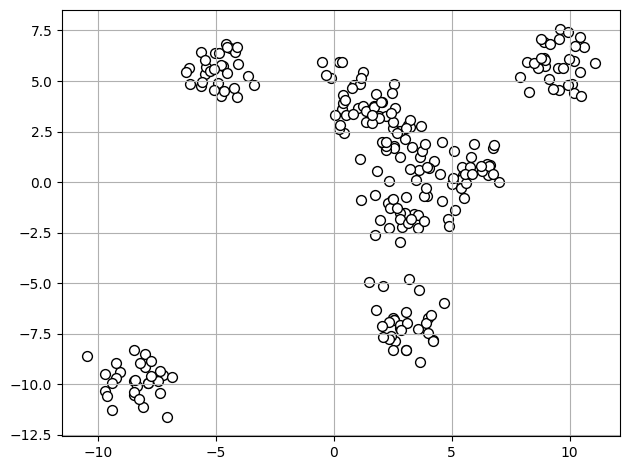

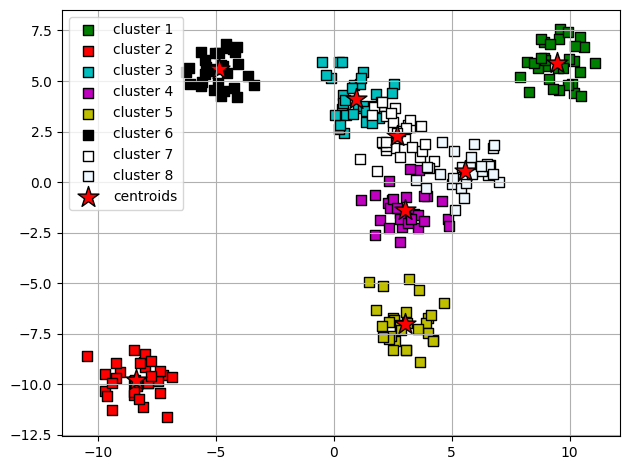

In [32]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
n_clusters=8
X, y = make_blobs(n_samples=250, 
                  n_features=5, 
                  centers=n_clusters, 
                  cluster_std=0.85, 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()


km = KMeans(n_clusters=n_clusters,
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

y_km = km.fit_predict(X)
PlotClusters(X,y, km)

    



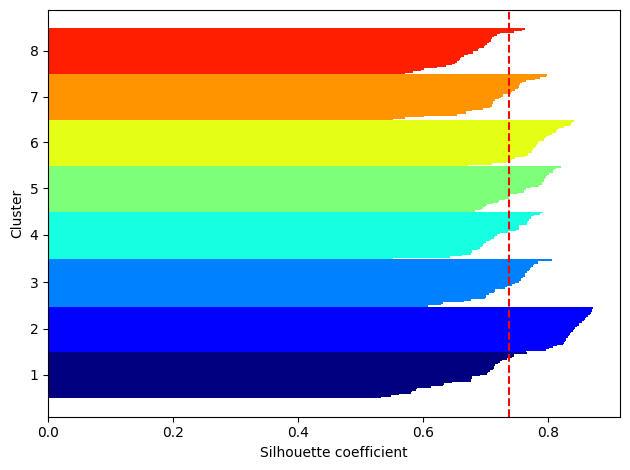

In [33]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

Comparison to "bad" clustering:

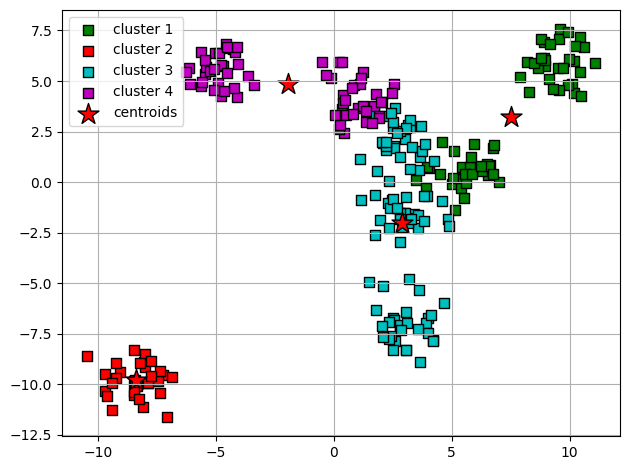

In [34]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

PlotClusters(X,y_km, km)


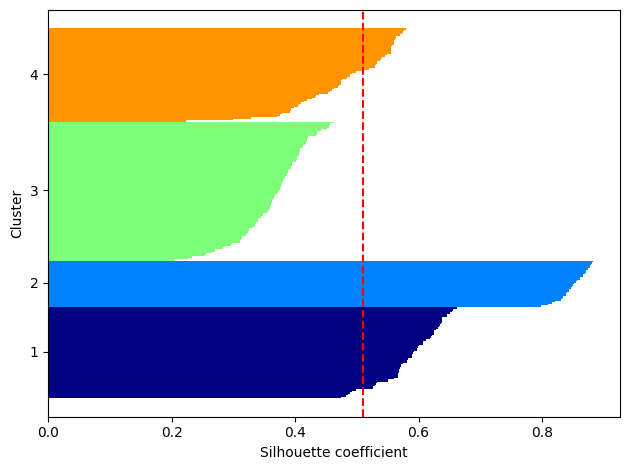

In [35]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

# Detect dense, contiguous regions with DBSCAN

The basic idea of the algorithm is the concept of __density-connectedness.__ Two objects are considered to be density-connected if there is a chain of dense objects (core objects, with more than `minPts` neighbours) connecting these points. The objects connected by the same core objects form a cluster. Objects that are not part of a dense-connected cluster are called noise.

In DBSCAN there are *three types of points*:

- Core objects, which are themselves dense.
- Density-reachable objects. These are objects that can be reached by a core object of the cluster, but are not dense themselves. These form the edge of a cluster.
- Noise points that are neither dense nor density-reachable.

The algorithm has two parameters: $\varepsilon$ and `minPts`. Here, $\varepsilon$ defines the neighbourhood length of a point: a second point can be reached from a point if its distance is smaller than $\varepsilon$. 'minPts', on the other hand, defines when an object is dense (i.e. a core object): when it has at least 'minPts' $\varepsilon$-reachable neighbours.

Density-reachable points can be density-reachable from more than one cluster. These points are assigned non-deterministically to one of the possible clusters by the algorithm. This also implies that density-connectedness is not transitive; density-reachability is not symmetric.

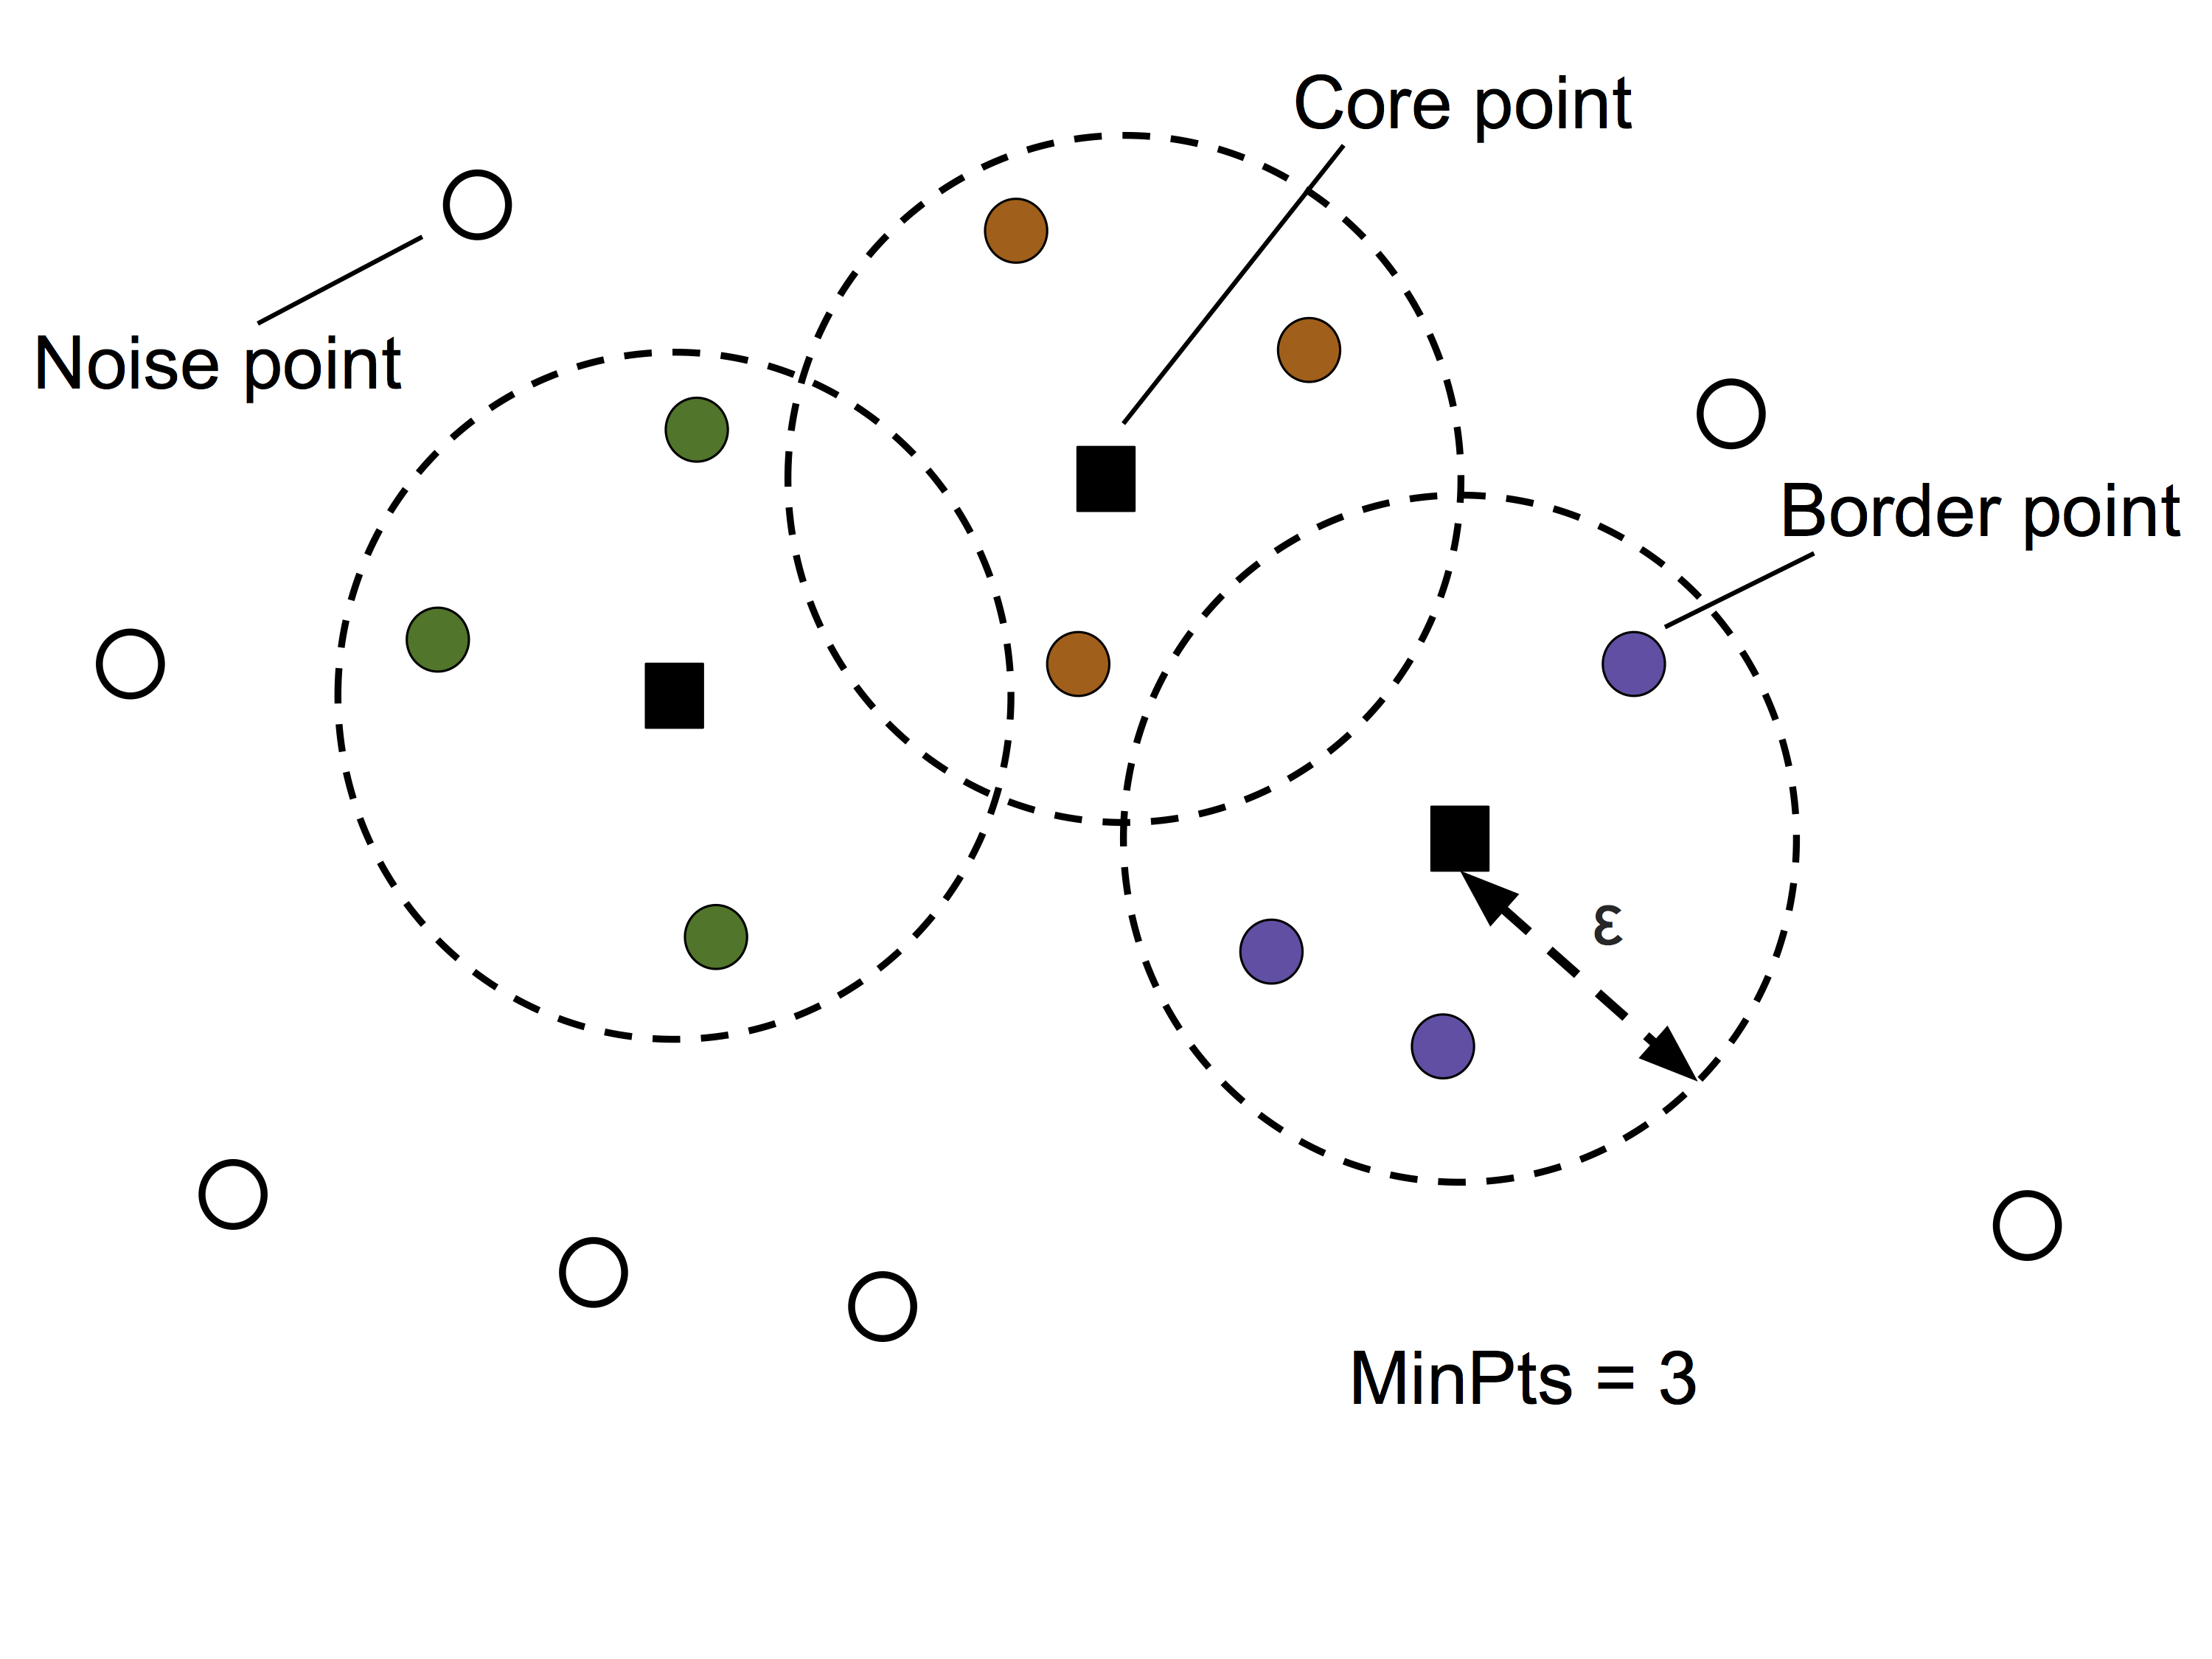

In [36]:
Image(filename='Bilder/11_13.png', width=500) 

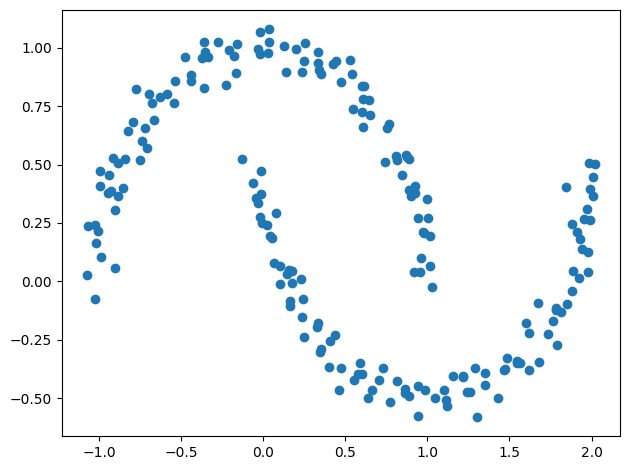

In [37]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

K-means and hierarchical clustering:

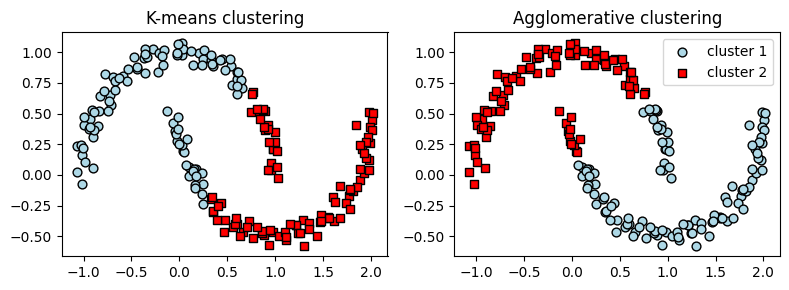

In [39]:
from sklearn.cluster import KMeans

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             # affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

Density-based clustering:

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

<br>
<br>